In [5]:
from collections import defaultdict, Counter
import jieba
import numpy as np


corpus=[
    "我特别特别喜欢看电影",
    "这部电影真的是很好看的电影",
    "今天天⽓真好是难得的好天⽓",
    "我今天去看了⼀部电影",
    "电影院的电影都很好看"
]
corpus_tokenized = [list(jieba.cut(sentence)) for sentence in corpus]
print(corpus_tokenized)

[['我', '特别', '特别', '喜欢', '看', '电影'], ['这部', '电影', '真的', '是', '很', '好看', '的', '电影'], ['今天', '天', '⽓', '真好', '是', '难得', '的', '好', '天', '⽓'], ['我', '今天', '去', '看', '了', '⼀', '部', '电影'], ['电影院', '的', '电影', '都', '很', '好看']]


In [2]:
word_dict = {}
for sentence in corpus_tokenized:
    for word in sentence:
        if word not in word_dict:
            word_dict[word] = len(word_dict)
print("词汇表：", word_dict)

词汇表： {'我': 0, '特别': 1, '喜欢': 2, '看': 3, '电影': 4, '这部': 5, '真的': 6, '是': 7, '很': 8, '好看': 9, '的': 10, '今天': 11, '天': 12, '⽓': 13, '真好': 14, '难得': 15, '好': 16, '去': 17, '了': 18, '⼀': 19, '部': 20, '电影院': 21, '都': 22}


In [4]:
bow_vectors = []
for sentence in corpus_tokenized:
    sentence_vector = [0] * len(word_dict)
    for word in sentence:
        sentence_vector[word_dict[word]] += 1
    bow_vectors.append(sentence_vector)
print("词袋表示：")
for vector in bow_vectors:
    print(vector)

词袋表示：
[1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [9]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product / (norm_a * norm_b)

In [10]:
similarity_matrix = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_matrix[i][j] = cosine_similarity(bow_vectors[i], bow_vectors[j])

/Users/bytedance/miniconda3/envs/agent/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12115 (\N{KANGXI RADICAL STEAM}) missing from font(s) Arial Unicode MS.
  fig.canvas.draw()
/Users/bytedance/miniconda3/envs/agent/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12032 (\N{KANGXI RADICAL ONE}) missing from font(s) Arial Unicode MS.
  fig.canvas.draw()
/Users/bytedance/miniconda3/envs/agent/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12115 (\N{KANGXI RADICAL STEAM}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/bytedance/miniconda3/envs/agent/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12032 (\N{KANGXI RADICAL ONE}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


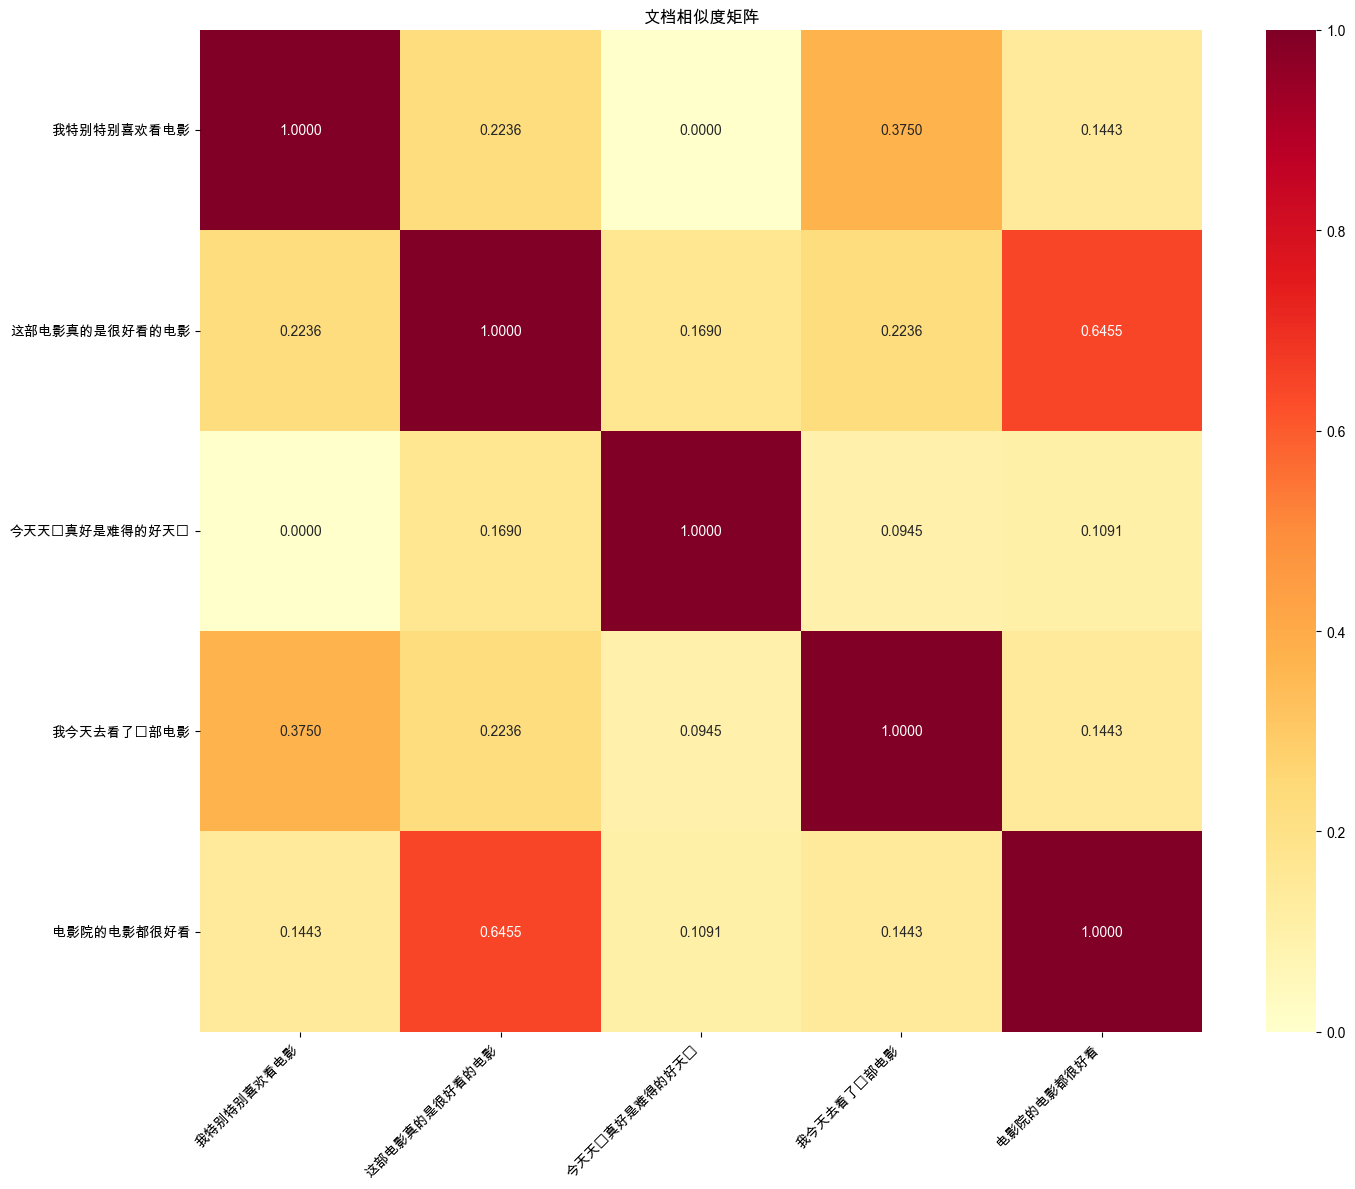

In [18]:
# ... existing code ...
similarity_matrix = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_matrix[i][j] = cosine_similarity(bow_vectors[i], bow_vectors[j])

# 绘制相似度矩阵热力图
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体，避免显示乱码
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # MacOS系统推荐使用
plt.rcParams['axes.unicode_minus'] = False
# 设置图形大小
plt.figure(figsize=(15, 12))

# 创建热力图
sns.heatmap(similarity_matrix, 
            annot=True,  # 显示数值
            cmap='YlOrRd',  # 使用YlOrRd配色方案
            fmt='.4f',  # 数值保留两位小数
            square=True,  # 保持方形
            xticklabels=corpus,  # x轴标签
            yticklabels=corpus  # y轴标签
        )

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# 设置标题
plt.title('文档相似度矩阵')
# 调整布局，确保所有标签都可见
plt.tight_layout()

# 显示图形
plt.show()